In [12]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from floquet_simulations.plot_functions import PlotParams
import scipy.integrate as integrate
from numpy import pi, sin, cos
from scipy.special import jv
figsize_hams=(4.3,4.3)
fontsize = 10
PlotParams(fontsize=fontsize)
cm_unit = 1/2.54
save_dir = Path().absolute().parent.parent/"figures"/"thesis"/"floquet"

def ConvertToFloat(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        try:
            num, denom = frac_str.split('/')
        except ValueError:
            return None
        try:
            leading, num = num.split(' ')
        except ValueError:
            return float(num) / float(denom)        
        if float(leading) < 0:
            sign_mult = -1
        else:
            sign_mult = 1
        return float(leading) + sign_mult * (float(num) / float(denom))
    
def f_J12(A2, A3, omega0, phi3):
    
    alpha = 1
    
    omega2 = alpha*omega0

    J12 = jv(0,A2/omega2)


    return np.abs(J12)



def f_J23(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    return np.abs(J23)

    
def f_J31(A2, A3, omega0, phi3):
    

    beta = 2

    omega3 = beta*omega0


    J31 = jv(0, A3/omega3)


    return np.abs(J31)

In [5]:
omega0 = 8
alpha=1; beta=2
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"continuous_neighbourhood_grad_descent_findminimum_initial_conds.csv"
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"grad_descent_findminimum_truevals.csv"
data_dir = Path().absolute().parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.5,.3).csv"

In [6]:
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"xi0_frac": ConvertToFloat
                   }
                  )

In [7]:
r10 = 0.5
r20 = 0.3

dfP = df[(df.xi0_frac <=1)
        &(df.r10 == r10)
        &(df.r20 == r20)
        &(df.algo ==
        #    "FindMinimum,PG=3,AG=3,MI=inf,imported_ic_smart4.0")
           "FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic")
          # "FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic,3")

        ]

dfP = dfP.sort_values(by="xi0_frac")
dfP.xi0_frac = np.round(dfP.xi0_frac.to_list(), 3)


In [11]:
# dfP.to_csv(Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.9,.9).csv", index=False)

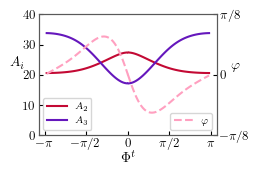

In [23]:
figsize = (5.9/2.56, 4/2.56)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(dfP.xi0_frac, dfP.A2, '-', c="#C30934", label=r"$A_2$", ms = 1)
ax1.plot(dfP.xi0_frac, dfP.A3, '-', c="#6517BC", label=r"$A_3$", ms = 1)
ax1.set_yticks([ 0,10, 20, 30,40])
ax1.set_xticks(np.linspace(-1,1,5))
ax1.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax1.set_xlabel(r"$\Phi^t$")
ax1.xaxis.set_label_coords(0.5,-0.14)

ax1.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax1.set_ylabel(r"$A_i$", rotation=0)
ax1.yaxis.set_label_coords(-0.12, 0.54)

ax2 = ax1.twinx()
ax2.plot(dfP[dfP.xi0_frac <=0].xi0_frac, dfP[dfP.xi0_frac <=0].phi, '--', c="#FFA0C0", label=r"$\varphi$", ms = 1)
ax2.plot(dfP[dfP.xi0_frac >=0].xi0_frac, dfP[dfP.xi0_frac >=0].phi, '--', c="#FFA0C0", ms = 1)
ax2.set_yticks([-pi/8, 0, pi/8])
ax2.set_yticklabels([r"$-\pi/8$", r"$0$", r"$\pi/8$"])
ax2.set_ylabel(r"$\varphi$", rotation=0)
ax2.yaxis.set_label_coords(1.1,0.63)
ax2.tick_params(axis="y", left=False, right=True, labelleft=False, 
        labelright=True, direction = "in", length = 3, pad=2)  

leg = ax1.legend(loc='lower left', bbox_to_anchor=(0, 0))
leg2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0))
fig.savefig(save_dir/"flux_drive_params_findmin_nh=(0.5,0.3).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

In [10]:
dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ31"] = dfP.apply(lambda row : f_J31(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

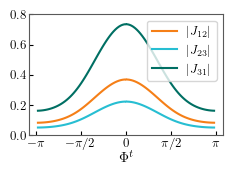

In [19]:
figsize = (6.4/2.56, 4/2.56)
marker = "-"
fig, ax = plt.subplots(figsize=figsize)


ax.plot(dfP.xi0_frac, dfP.absJ12, marker, c="#F57F17", label=r"$|J_{12}|$")
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, c="#27BED2", label=r"$|J_{23}|$")
ax.plot(dfP.xi0_frac, dfP.absJ31, marker, c="#006F63", label=r"$|J_{31}|$")
ax.set_xticks(np.linspace(-1,1,5))
ax.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax.xaxis.set_label_coords(0.5,-0.14)

ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2) 

ax.set_xlabel(r"$\Phi^t$")
ax.set_yticks(np.linspace(0, 0.8, 5))
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='upper right', bbox_to_anchor=(1,1), fontsize=fontsize*0.9)

fig.savefig(save_dir/"flux_J_params_findmin_nh=(0.5,0.3).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

In [24]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.9,.9).csv"

In [25]:
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"xi0_frac": ConvertToFloat
                   }
                  )

In [27]:
r10 = 0.9
r20 = 0.9

dfP = df[(df.xi0_frac <=1)
        &(df.r10 == r10)
        &(df.r20 == r20)
        ]

dfP = dfP.sort_values(by="xi0_frac")
dfP.xi0_frac = np.round(dfP.xi0_frac.to_list(), 3)


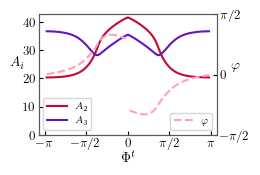

In [36]:
figsize = (5.9/2.56, 4/2.56)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(dfP.xi0_frac, dfP.A2, '-', c="#C30934", label=r"$A_2$", ms = 1)
ax1.plot(dfP.xi0_frac, dfP.A3, '-', c="#6517BC", label=r"$A_3$", ms = 1)
ax1.set_yticks([ 0,10, 20, 30,40])
ax1.set_xticks(np.linspace(-1,1,5))
ax1.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax1.set_xlabel(r"$\Phi^t$")
ax1.xaxis.set_label_coords(0.5,-0.14)

ax1.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax1.set_ylabel(r"$A_i$", rotation=0)
ax1.yaxis.set_label_coords(-0.12, 0.54)

ax2 = ax1.twinx()
ax2.plot(dfP[dfP.xi0_frac <0].xi0_frac, dfP[dfP.xi0_frac <0].phi, '--', c="#FFA0C0", label=r"$\varphi$", ms = 1)
ax2.plot(dfP[dfP.xi0_frac >0].xi0_frac, dfP[dfP.xi0_frac >0].phi, '--', c="#FFA0C0", ms = 1)
ax2.set_yticks([-pi/2, 0, pi/2])
ax2.set_yticklabels([r"$-\pi/2$", r"$0$",  r"$\pi/2$"])
ax2.set_ylabel(r"$\varphi$", rotation=0)
ax2.yaxis.set_label_coords(1.1,0.63)
ax2.tick_params(axis="y", left=False, right=True, labelleft=False, 
        labelright=True, direction = "in", length = 3, pad=2)  

leg = ax1.legend(loc='lower left', bbox_to_anchor=(0, 0))
leg2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0))
fig.savefig(save_dir/"flux_drive_params_findmin_nh=(0.9,0.9).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

In [37]:
dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ31"] = dfP.apply(lambda row : f_J31(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)


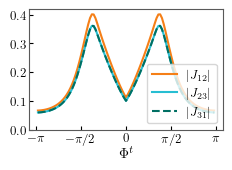

In [44]:
figsize = (6.4/2.56, 4/2.56)
marker = "-"
marker1 = "--"
fig, ax = plt.subplots(figsize=figsize)


ax.plot(dfP.xi0_frac, dfP.absJ12, marker, c="#F57F17", label=r"$|J_{12}|$")
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, c="#27BED2", label=r"$|J_{23}|$")
ax.plot(dfP.xi0_frac, dfP.absJ31, marker1, c="#006F63", label=r"$|J_{31}|$")
ax.set_xticks(np.linspace(-1,1,5))
ax.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax.xaxis.set_label_coords(0.5,-0.14)

ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2) 

ax.set_xlabel(r"$\Phi^t$")
ax.set_yticks(np.linspace(0, 0.4, 5))
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='lower right', bbox_to_anchor=(1,0), fontsize=fontsize*0.9)

fig.savefig(save_dir/"flux_J_params_findmin_nh=(0.9,0.9).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()